In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

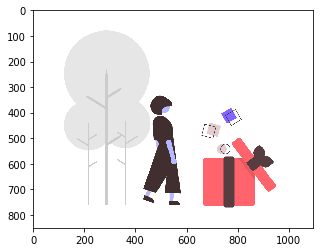

In [2]:
image = cv2.imread("images/gift_box.png")
plt.imshow(image)

### See the image above and understand the co-ordinate system.

### X axis is similar to our normal system. However, Y axis starts at 0 from top!
### Where is the 0,0 co-ordinate in the image?

In [11]:
print("Image data type: {}\nImage shape: {}\nSingle Image Channel Shape: {}\nSingle Image Channel: {}".format(type(image), image.shape, image[:, :, 0].shape, image[:, :, 0]))

Image data type: <class 'numpy.ndarray'>
Image shape: (851, 1097, 3)
Single Image Channel Shape: (851, 1097)
Single Image Channel: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


### What can we infer from the above information?

#### The image is nothing but a numpy array. Simple matrix? repated 3 times.
#### The shape suggests height, width and channels respectively of the image.
#### We can easily access different channels of the image using numpy slicing or cv2.split method.

#### Tip: `image[:, :, 0]` => The slicing options passed to the array are - rows, columns, channels
#### ':'  ===> means all (from start to end),  '0' ===> means the first channel

Channel 1 (Blue): 


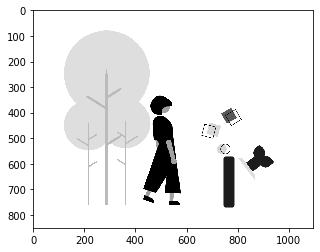

Channel 2 (Green): 


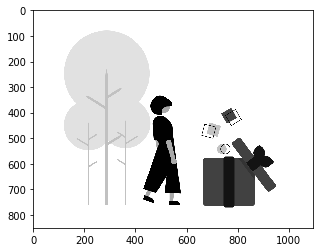

Channel 3 (Red): 


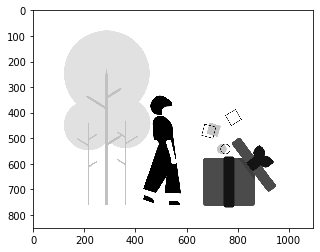

In [17]:
# See single channel

print("Channel 1 (Blue): ")
plt.imshow(image[:, :, 0], cmap='gray')
plt.show()

print("Channel 2 (Green): ")
plt.imshow(image[:, :, 1], cmap='gray')
plt.show()

print("Channel 3 (Red): ")
plt.imshow(image[:, :, 2], cmap='gray')
plt.show()

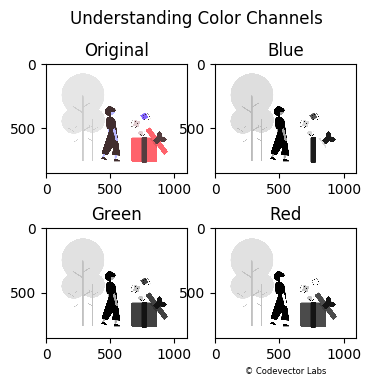

In [35]:
# See all images in grid

title_array = ["Original", "Blue", "Green", "Red"]
images_array = [image, image[:,:,0], image[:,:,1], image[:,:,2]] # Original, Blue Channel, Green Channel, Red Channel

fig = plt.figure(figsize=(4,4), dpi=100) # specifying the overall grid size

for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.title.set_text(title_array[i])
    plt.imshow(images_array[i], cmap='gray')

fig.suptitle("Understanding Color Channels")
plt.xlabel("© Codevector Labs", fontsize=6)
plt.show()
fig.savefig('images/output_3_understanding_channels.png', dpi=200)

### Don't make efforts to understand all the lines in above cell.

#### Important point: see second line of code `images_array`. We have passed original image along with blue, green, red channels.
#### Try to find out differences in the image?
#### Do you now understand the three components of image, Red, Green, Blue (RGB) in the above image?

In [39]:
import pandas as pd

## Let's see the image in excel

In [48]:
low_quality_image = cv2.resize(image, (100, 100))

df = pd.DataFrame(low_quality_image[:, :, 2])

# Save the dataframe to csv
df.to_csv("csv/output_3_channel.csv")

print("Dataframe shape: {}".format(df.shape))

Dataframe shape: (100, 100)


### Open the above csv file in Excel or Libre Office Calc or any other software of your choice.
### See the csv file with different zoom options.

### Note down your observations

### The csv file contains many different numbers

### Each number corresponds to the pixel intensity value

### 0 means dark (black) while 255 means the brightest (white)

### The pixel is unit block of an image. Many pixels contribute to make an image. The range is 0-255.

In [55]:
### Now let's do some numpy operations on the image

height, width, channels = image.shape

print("Height: {}\nWidth: {}\nChannels: {}".format(height, width, channels))

Height: 851
Width: 1097
Channels: 3


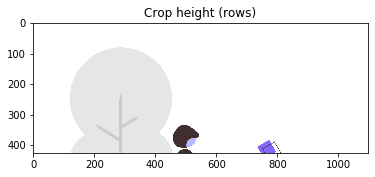

In [56]:
plt.title("Crop height (rows)")
plt.imshow(image[:int(height/2), :, :])

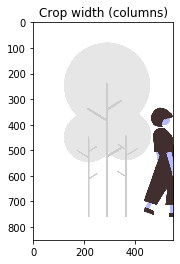

In [57]:
plt.title("Crop width (columns)")
plt.imshow(image[:, :int(width/2), :])

Cropped image shape: (451, 697, 3)


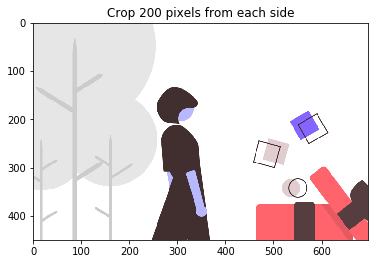

In [63]:
crop_200_image = image[200:-200, 200:-200, :]

print("Cropped image shape: {}".format(crop_200_image.shape))

plt.title("Crop 200 pixels from each side")
plt.imshow(crop_200_image)

### In the above code we simply cropped 200 pixels from each side.

### `image[<start row number>:<end row number>, <start column number>:<end column number>, <start channel number>:<end channel number>]`

### If any side eg. <start row number> is not provided then it starts from the very start (first row).

### `-200` means leave last 200 rows/columns etc.